In [409]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [410]:
csv_path = "Resources/annual_generation_state.csv"

In [411]:
gen_df = pd.read_csv(csv_path, header = None)

In [412]:
gen_df.head()

,0,1,2,3,4
0,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
1,2015,AK,Total Electric Power Industry,Total,"6,284,937"
2,2015,AK,Total Electric Power Industry,Coal,"667,549"
3,2015,AK,Total Electric Power Industry,Hydroelectric Conventional,"1,568,929"
4,2015,AK,Total Electric Power Industry,Natural Gas,"3,089,713"


In [506]:
gen_df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [414]:
gen_df1 = gen_df[[0, 1, 2, 3, 4]]
print(gen_df1)

          0      1                                        2  \
0      YEAR  STATE                         TYPE OF PRODUCER   
1      2015     AK            Total Electric Power Industry   
2      2015     AK            Total Electric Power Industry   
3      2015     AK            Total Electric Power Industry   
4      2015     AK            Total Electric Power Industry   
...     ...    ...                                      ...   
12578  2020     WY  Electric Generators, Electric Utilities   
12579  2020     WY  Electric Generators, Electric Utilities   
12580  2020     WY  Electric Generators, Electric Utilities   
12581  2020     WY  Electric Generators, Electric Utilities   
12582  2020     WY  Electric Generators, Electric Utilities   

                                3                           4  
0                   ENERGY SOURCE  GENERATION (Megawatthours)  
1                           Total                   6,284,937  
2                            Coal                  

In [415]:
true_header = new_header = gen_df1.iloc[0]
gen_df1 = gen_df1[1:]
gen_df1.columns = true_header
gen_df1.head()

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
1,2015,AK,Total Electric Power Industry,Total,"6,284,937"
2,2015,AK,Total Electric Power Industry,Coal,"667,549"
3,2015,AK,Total Electric Power Industry,Hydroelectric Conventional,"1,568,929"
4,2015,AK,Total Electric Power Industry,Natural Gas,"3,089,713"
5,2015,AK,Total Electric Power Industry,Other,"-2,407"


In [416]:
gen_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12582 entries, 1 to 12582
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   YEAR                        12582 non-null  object
 1   STATE                       12582 non-null  object
 2   TYPE OF PRODUCER            12582 non-null  object
 3   ENERGY SOURCE               12582 non-null  object
 4   GENERATION (Megawatthours)  12581 non-null  object
dtypes: object(5)
memory usage: 491.6+ KB


In [417]:
gen_df1 = gen_df1.dropna(how="any")
gen_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12581 entries, 1 to 12582
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   YEAR                        12581 non-null  object
 1   STATE                       12581 non-null  object
 2   TYPE OF PRODUCER            12581 non-null  object
 3   ENERGY SOURCE               12581 non-null  object
 4   GENERATION (Megawatthours)  12581 non-null  object
dtypes: object(5)
memory usage: 589.7+ KB


In [482]:
gen_df1 = gen_df1.rename(columns={"GENERATION (Megawatthours)": "GENERATION"})
gen_df1.columns

Index(['YEAR', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE', 'GENERATION'], dtype='object', name=0)

In [525]:
gen_df1["GENERATION"] = gen_df1["GENERATION"].str.replace(",", "")
gen_df1["GENERATION"]

1         6284937
2          667549
3         1568929
4         3089713
5           -2407
           ...   
12578    32361811
12579     1075863
12580      647464
12581       44556
12582     2563506
Name: GENERATION, Length: 12581, dtype: object

In [530]:
gen_df1["GENERATION"] = gen_df1["GENERATION"].astype("int64")

In [531]:
#Create data frame to review national energy sources. 
USgen_df = gen_df1[(gen_df1.STATE == "US-Total")]
#Create data frameA to review state energy sources. 
TXgen_df = gen_df1[(gen_df1.STATE == "TX")]
CAgen_df = gen_df1[(gen_df1.STATE == "CA")] 

In [636]:
UStot_df = USgen_df[["YEAR", "ENERGY SOURCE", "GENERATION"]]
fil_UStot_df = UStot_df[UStot_df["ENERGY SOURCE"].str.contains("Total")==False]
fil_UStot_df.info()
fil_UStot_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 1714 to 12313
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   YEAR           404 non-null    object
 1   ENERGY SOURCE  404 non-null    object
 2   GENERATION     404 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.6+ KB


,YEAR,ENERGY SOURCE,GENERATION
1714,2015,Coal,1352398197
1715,2015,Geothermal,15917575
1716,2015,Pumped Storage,-5091488
1717,2015,Hydroelectric Conventional,249080085
1718,2015,Natural Gas,1334668003
...,...,...,...
12309,2020,Petroleum,12845022
12310,2020,Solar Thermal and Photovoltaic,9944816
12311,2020,Other Biomass,1251536
12312,2020,Wind,55554244


1713                              Total
1714                               Coal
1715                         Geothermal
1716                     Pumped Storage
1717         Hydroelectric Conventional
                      ...              
12309                         Petroleum
12310    Solar Thermal and Photovoltaic
12311                     Other Biomass
12312                              Wind
12313       Wood and Wood Derived Fuels
Name: ENERGY SOURCE, Length: 440, dtype: object
1714     1352398197
1715       15917575
1716       -5091488
1717      249080085
1718     1334668003
            ...    
12309      12845022
12310       9944816
12311       1251536
12312      55554244
12313       2076663
Name: GENERATION, Length: 404, dtype: int64


In [719]:
USgentot_df = UStot_df.groupby(["ENERGY SOURCE"])["GENERATION"].sum()
USgentot_df = USgentot_df.drop(["Pumped Storage", "Total"])
USgentot_df.info


<bound method Series.info of ENERGY SOURCE
Coal                              13370438348
Geothermal                          189999408
Hydroelectric Conventional         3365793565
Natural Gas                       17397613928
Nuclear                            9628388124
Other                               159623570
Other Biomass                       246957013
Other Gases                         152530834
Petroleum                           269501772
Solar Thermal and Photovoltaic      678389482
Wind                               3157003583
Wood and Wood Derived Fuels         479395469
Name: GENERATION, dtype: int64>

array([<AxesSubplot:ylabel='GENERATION'>], dtype=object)

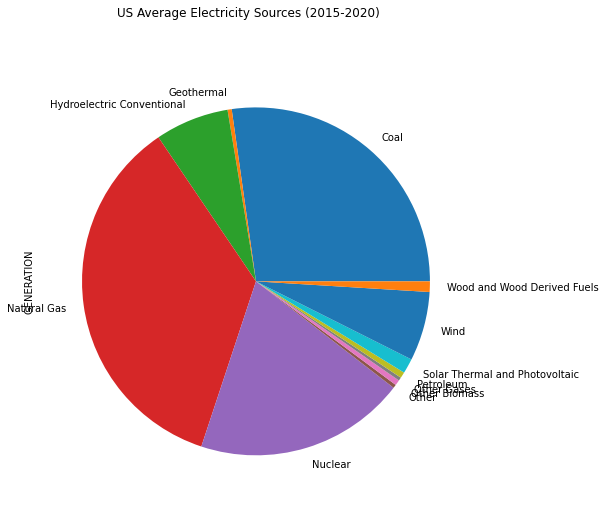

In [727]:
USgentot_df.plot(kind="pie", subplots=True, figsize=(8,8), title="US Average Electricity Sources (2015-2020)")

([<matplotlib.patches.Wedge at 0x7fdbad3e7250>,
 [Text(1.083565313108011, 0.1894365651851253, '2704796394'),
  Text(0.9628301782548168, 0.5319380112774402, '2478297307'),
  Text(0.752334867362209, 0.80249127556073, '2411670552'),
  Text(0.4801651952894287, 0.9896673103789299, '2298974677'),
  Text(0.19814103477650222, 1.0820074539196562, '1929913623'),
  Text(-0.04547706830078068, 1.0990595235285332, '1546785795'),
  Text(-0.1560777648503379, 1.0888708515335153, '31835150'),
  Text(-0.1604999700449178, 1.0882278068564415, '31651614'),
  Text(-0.1649208067798069, 1.0875666083008884, '31853548'),
  Text(-0.16935857841805055, 1.0868843875574887, '31934268'),
  Text(-0.17373041056461722, 1.0861941559615618, '30945434'),
  Text(-0.17808867273087967, 1.0854881043313895, '31779394'),
  Text(-0.21478860714441858, 1.0788261464392495, '498160170'),
  Text(-0.2856323125295741, 1.0622684133678304, '535624306'),
  Text(-0.36204747400125176, 1.0387115223050687, '600665859'),
  Text(-0.43974037368463

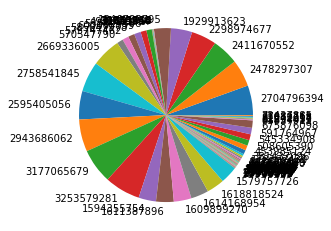

In [715]:
plt.pie(x, labels=labels)

In [728]:
USG_sourcedata = USG_sourcedata.rename({"Hydroelectric Conventional":"Hydroelectric", "Other Biomass": "Biomass", "Solar Thermal and Photovoltaic": "Solar", "Wood and Wood Derived Fuels": "Wood Fuels"})

In [ ]:

#